In [1]:
import requests as req
import my_utils as mu
import pandas as pd
from tqdm import tqdm
from PIL import Image
from io import BytesIO

In [2]:
riot_api_key = ''

In [ ]:
sample = mu.getSampleData('diamond', 1, 10, riot_api_key)

In [2]:
item = req.get('http://ddragon.leagueoflegends.com/cdn/13.8.1/data/ko_KR/item.json').json()

In [2]:
rune_data = pd.DataFrame(req.get('http://ddragon.leagueoflegends.com/cdn/13.8.1/data/ko_KR/runesReforged.json').json())

In [3]:
rune_df = []
colname = ['id', 'name', 'key', 'icon', 'shortDesc', 'longDesc']
for type in rune_data.iloc:
    for slot in type['slots']:
        for rune in slot['runes']:
            rune_df.append([
                rune[colname[0]], type['id'],
                rune[colname[1]], rune[colname[2]],
                'http://ddragon.leagueoflegends.com/cdn/img/'+rune[colname[3]],
                rune[colname[4]], rune[colname[5]]
            ])
            # [rune[c] for c in colname]
rune_df = pd.DataFrame(rune_df, columns=['RUNEID', 'RUNETYPEID', 'RUNENAME', 'RUNEKEY', 'RUNEICON', 'RUNESHORTDESC', 'RUNELONGDESC'])

In [ ]:
rune_df.sort_values('RUNETYPEID', ignore_index=True)

In [5]:
rune_type_df = []
for type in rune_data.iloc:
    rune_type_df.append([type[c] for c in colname[:4]])
rune_type_df = pd.DataFrame(rune_type_df, columns=['RUNETYPEID', 'RUNETYPENAME', 'RUNETYPEKEY', 'RUNETYPEICON'])

In [ ]:
rune_type_df.sort_values('RUNETYPEID', ignore_index=True)

In [ ]:
mu.insertDataFrameIntoTable(rune_type_df, 'TEST_RUNE_TYPE')

In [ ]:
mu.insertDataFrameIntoTable(rune_df, 'TEST_RUNE')

oracle open!
oracle close!


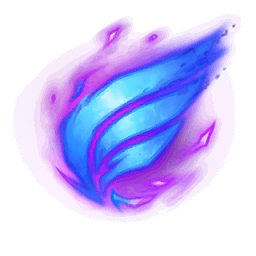

In [12]:
Image.open(BytesIO(req.get(mu.oracle_totalExecute('SELECT RUNEICON FROM TEST_RUNE WHERE RUNENAME = \'난입\'').values[0][0]).content))

In [68]:
cdimg = 'https://raw.communitydragon.org/latest/plugins/rcp-be-lol-game-data/global/default/v1/'

In [72]:
rune_img = rune[rune['id'] == 8200]['slots'].values[0][0]['runes'][0]['icon'].lower()

In [83]:
img = req.get(cdimg+rune_img).content